In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('data_.csv')
df.head()

,X,Y
0,-10.0,-20.0
1,10.0,30.0
2,11.0,28.0
3,-12.0,21.0
4,20.0,-18.0


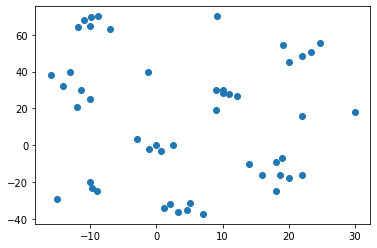

In [3]:
plt.scatter(df['X'], df['Y'])

In [4]:
km = KMeans(n_clusters=8)
km

KMeans()

In [5]:
predicted = km.fit_predict(df)
predicted

array([0, 4, 4, 2, 3, 0, 4, 0, 4, 4, 0, 4, 2, 3, 3, 2, 2, 3, 2, 7, 7, 7,
       7, 7, 1, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 2, 5, 6, 6, 6, 6, 6, 6, 3,
       3, 3, 3, 5, 2, 4])

In [6]:
df['cluster'] = predicted
df

,X,Y,cluster
0,-10.00,-20.00,0
1,10.00,30.00,4
2,11.00,28.00,4
3,-12.00,21.00,2
4,20.00,-18.00,3
5,-9.00,-25.00,0
6,12.22,26.98,4
7,-9.80,-23.25,0
8,10.00,28.20,4
9,9.00,19.25,4


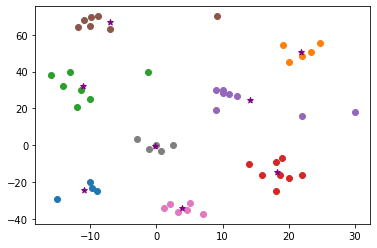

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
#plt.scatter(df1.X,df1.Y,color='green')
#plt.scatter(df2.X,df2.Y,color='red')
#plt.scatter(df3.X,df3.Y,color='black')
for i in range(0,8) :
    dfi = df[df.cluster==i]
    c = colors[i]
    plt.scatter(dfi.X, dfi.Y)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#plt.legend()

# Mean Shift

In [8]:
df = df.drop('cluster', 1)
X = df.values
X

array([[-10.  , -20.  ],
       [ 10.  ,  30.  ],
       [ 11.  ,  28.  ],
       [-12.  ,  21.  ],
       [ 20.  , -18.  ],
       [ -9.  , -25.  ],
       [ 12.22,  26.98],
       [ -9.8 , -23.25],
       [ 10.  ,  28.2 ],
       [  9.  ,  19.25],
       [-15.  , -29.  ],
       [  9.  ,  30.  ],
       [-16.  ,  38.4 ],
       [ 14.  , -10.  ],
       [ 18.11, -25.  ],
       [-10.  ,  25.33],
       [-13.  ,  40.  ],
       [ 22.  , -16.  ],
       [-11.45,  30.  ],
       [  0.  ,   0.  ],
       [  0.62,  -2.92],
       [ -1.11,  -2.11],
       [ -2.88,   3.14],
       [  2.45,   0.  ],
       [ 20.  ,  45.  ],
       [ 21.99,  48.5 ],
       [ 23.33,  50.85],
       [ 19.1 ,  54.22],
       [ 24.77,  55.55],
       [ 29.99,  17.88],
       [-10.  ,  65.  ],
       [-11.  ,  68.  ],
       [-11.88,  64.  ],
       [ -9.88,  69.8 ],
       [ -8.88,  70.  ],
       [ -1.33,  39.99],
       [ -7.  ,  63.33],
       [  5.  , -31.2 ],
       [  3.22, -36.22],
       [  2.1 , -32.11],


In [9]:
ms = MeanShift()
ms.fit(df)
cluster_centers = ms.cluster_centers_
labels = ms.labels_
labels

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0], dtype=int64)

[[  1.72        44.5444    ]
 [  5.39173913 -18.35695652]]
Estimated clusters: 2


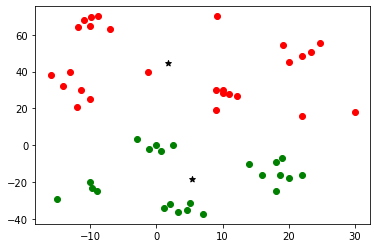

In [10]:
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(df)):
    plt.plot(X[i][0], X[i][1] , colors[labels[i]], markersize = 12)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker="*",color='k')
plt.show()

# DBSCAN

In [11]:
dbscan=DBSCAN(eps=10,min_samples=3)

In [12]:
dbscan.fit_predict(df)
dbscan
labels = dbscan.labels_
labels

array([ 0,  1,  1,  2,  3,  0,  1,  0,  1,  1,  0,  1,  2,  3,  3,  2,  2,
        3,  2,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5, -1,  6,  6,  6,  6,
        6, -1,  6,  7,  7,  7,  7,  7,  7,  3,  3,  3,  3, -1,  2, -1],
      dtype=int64)

In [13]:
df['cluster'] = labels
df

,X,Y,cluster
0,-10.00,-20.00,0
1,10.00,30.00,1
2,11.00,28.00,1
3,-12.00,21.00,2
4,20.00,-18.00,3
5,-9.00,-25.00,0
6,12.22,26.98,1
7,-9.80,-23.25,0
8,10.00,28.20,1
9,9.00,19.25,1


Estimated clusters: 8
[-10.95, 10.203333333333333, -12.758333333333333, 18.220000000000002, -0.184, 21.837999999999997, -9.773333333333335, 3.8283333333333336]
[-24.3125, 27.07166666666667, 31.138333333333332, -14.63875, -0.37799999999999984, 50.824, 66.68833333333333, -34.32666666666667]


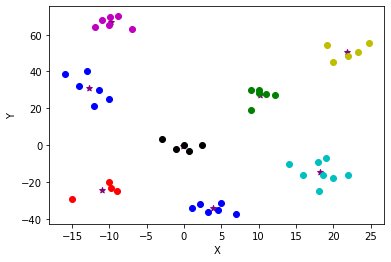

In [14]:
X = df.values
n_clusters_ = max(labels)+1
print("Estimated clusters:", n_clusters_)
centroidx = []
centroidy = []
colors = 10*['r.','g.','b.','c.','k.','y.','m.','b.']
for i in range(len(df)):
    if df['cluster'][i] != -1 :
        C = colors[df['cluster'][i]]
        plt.plot(X[i][0], X[i][1] , C , markersize = 12)


for i in range(n_clusters_):
    xc=0
    yc=0
    n=0
    for j in range(len(df)):
        if(df['cluster'][j] == i):
            xc += df['X'][j]
            yc += df['Y'][j]
            n += 1
    xc /= n
    yc /= n
    centroidx.append(xc)
    centroidy.append(yc)
plt.scatter(centroidx,centroidy,color='purple',marker='*',label='centroid')
plt.xlabel('X')
plt.ylabel('Y')
print(centroidx)
print(centroidy)



In [15]:
#Test on real & sample data sets
#Create large, round 70-80 points data

# GMM

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
data = pd.read_csv('data_.csv')
data.head()

,X,Y
0,-10.0,-20.0
1,10.0,30.0
2,11.0,28.0
3,-12.0,21.0
4,20.0,-18.0


In [18]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(data)

GaussianMixture(n_components=6)

In [19]:
#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
labels

array([5, 4, 4, 1, 0, 5, 4, 5, 4, 4, 5, 4, 1, 0, 0, 1, 1, 0, 1, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 2, 5, 5, 5, 5, 5, 5, 0,
       0, 0, 0, 2, 1, 4], dtype=int64)

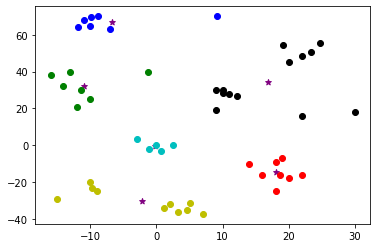

In [20]:
color=10*['r.','g.','b.','c.','k.','y.','m.']
centroidx = []
centroidy = []
for k in range(0,6):
    data = frame[frame["cluster"]==k]
    c=color[k]
    n = len(data)
    X=0
    Y=0
    for i in range (n):
        X += int(data["Weight"].values[i])
        Y += int(data["Height"].values[i])
    X /= n
    Y /= n
    centroidx.append(X)
    centroidy.append(Y)
    plt.plot(data["Weight"],data["Height"],c, markersize = 12)
plt.scatter(centroidx,centroidy,color='purple',marker='*',label='centroid')
plt.show()